# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()

#Display the result
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [37]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

#Display the duplicate rows
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Optional: Get all the data for the duplicate mouse ID.
# Find the Mouse IDs that are duplicated (based on both 'Mouse ID' and 'Timepoint')
duplicate_mouse_data = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_data)==False]

# Drop duplicates based on 'Mouse ID' and 'Timepoint'
duplicate_mouse_data = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


In [40]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of Mice after cleaning: ',len(clean_mouse_data.groupby('Mouse ID').count()))
clean_mouse_data.head()

Number of Mice after cleaning:  249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame
# Ensure 'Tumor Volume (mm3)' is numeric, coerce any errors to NaN
clean_mouse_data['Tumor Volume (mm3)'] = pd.to_numeric(clean_mouse_data['Tumor Volume (mm3)'], errors='coerce')

# Group by 'Drug Regimen' and calculate all summary statistics at once using agg()
summary_stats = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Display the results
summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<Axes: title={'center': 'Regimen over Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

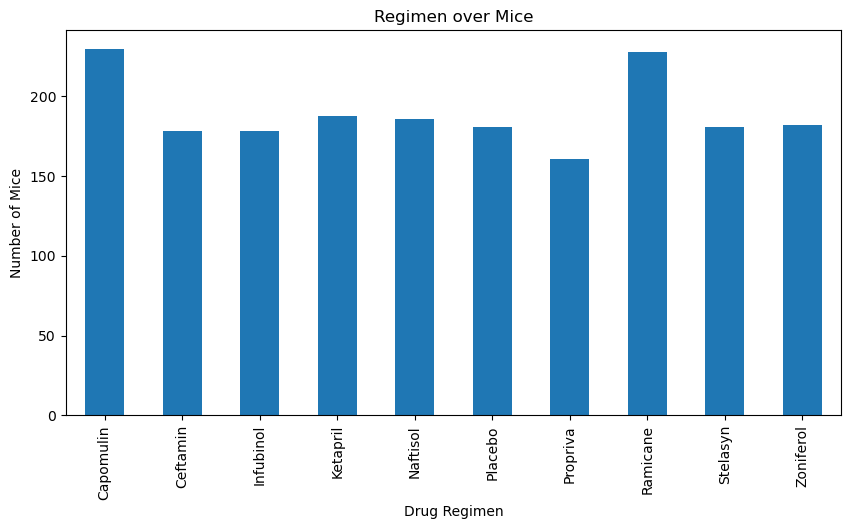

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_number_of_mice = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')

bar_number_of_mice.plot.bar(title='Regimen over Mice',y='Number of Mice',figsize=(10,5))

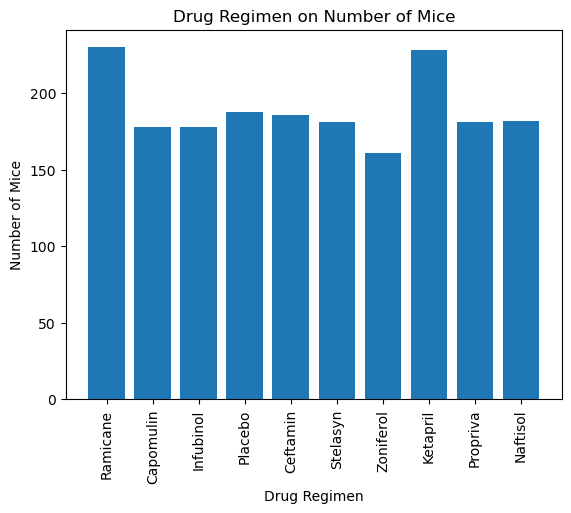

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = clean_mouse_data['Drug Regimen'].unique()

# Create a list indicating where to write labels and set figure size
x_axis = drug_names
y_axis = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')

#plt.figure(figsize=(10,5))

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()

Sex
Male      958
Female    935
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Female vs Male')

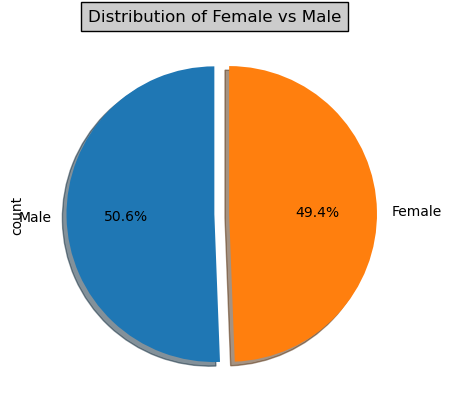

In [45]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
versus_sex = clean_mouse_data['Sex'].value_counts()
print(versus_sex)

versus_sex.plot(kind='pie',y='', autopct='%1.1f%%', startangle=90, shadow=True,explode=(0,0.1))
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':5})


(-1.1049977227391239,
 1.2049524141830756,
 -1.1001503025552368,
 1.1031578252724032)

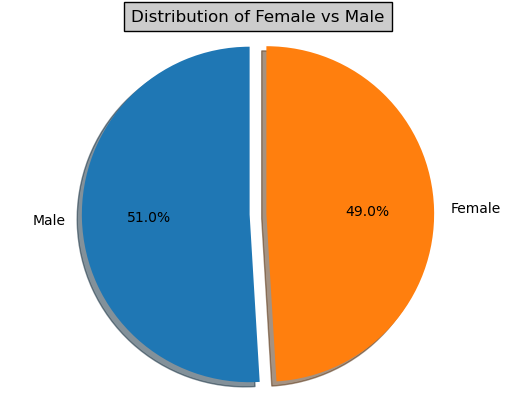

In [53]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
labels = 'Male' , 'Female'
sizes = [958,922]
explode=(0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':5})
ax1.axis('equal') 

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_df.merge(clean_mouse_data,on=['Mouse ID','Timepoint'], how='left')
print(max_timepoint_df.head())

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [55]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {'Capomulin': [],
                  'Ramicane': [],
                   'Infubinol': [], 
                   'Ceftamin': []}

#tumor_vol_final = ()

relevant_tumor = {'Capomulin': [],
            'Ramicane': [],
            'Infubinol': [], 
            'Ceftamin': []}

# Loop thru treatments
for name in treatment_names:
    # Loop thru regiments highest timepoint data
    for i in max_timepoint_df.index:
        # Append the tumor volume to the list
        if max_timepoint_df.iloc[i]['Drug Regimen'] == name:
            tumor_volume_data[name].append(max_timepoint_df.iloc[i]['Tumor Volume (mm3)'])
            #max_timepoint_df['Mouse ID','Timepoint','Drug Regumen','Tumor Volume (mm3)']
            #tumor_vol.append(max_timepoint_df.iloc[i]['Mouse ID','Timepoint','Drug Regumen','Tumor Volume (mm3)'])
            
# Create a new data frame added all values in
tumor_df = pd.DataFrame(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for name in treatment_names:
    # Add subset
    subset = max_timepoint_df[max_timepoint_df['Drug Regimen']== name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    # Bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = max_timepoint_df.loc[(max_timepoint_df['Tumor Volume (mm3)'] <= lower_bound) | (max_timepoint_df['Tumor Volume (mm3)'] >= upper_bound)]
print(outliers)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
97      k403         45     Ramicane    Male          21          16   
175     s185         45    Capomulin  Female           3          17   

     Tumor Volume (mm3)  Metastatic Sites  
97            22.050126                 1  
175           23.343598                 1  


{'whiskers': [<matplotlib.lines.Line2D at 0x168aee0e0>,
 'caps': [<matplotlib.lines.Line2D at 0x168aee620>,
 'boxes': [<matplotlib.lines.Line2D at 0x168aede40>],
 'medians': [<matplotlib.lines.Line2D at 0x168aeeb60>],
 'fliers': [<matplotlib.lines.Line2D at 0x168aeee00>],
 'means': []}

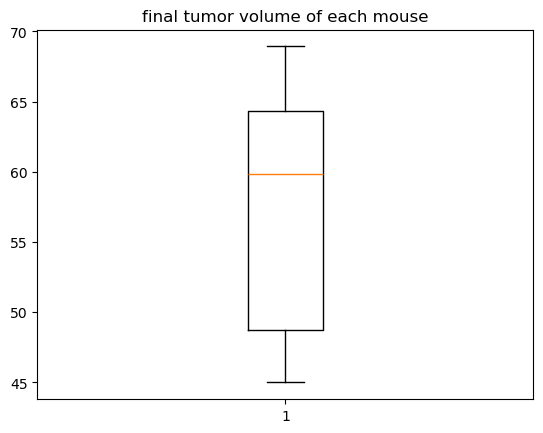

In [56]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('final tumor volume of each mouse')
ax3.boxplot(subset['Tumor Volume (mm3)'], flierprops=green_diamond)

## Line and Scatter Plots

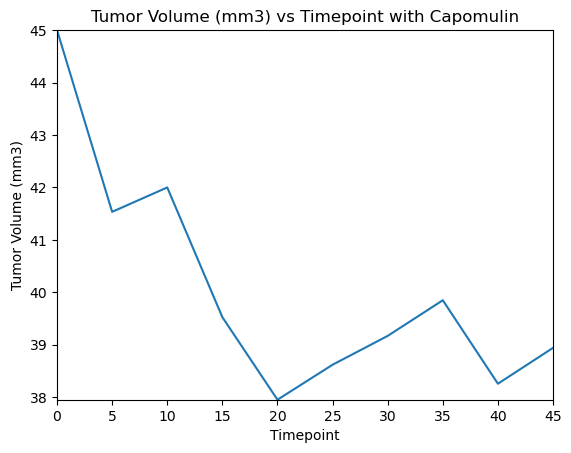

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_set = clean_mouse_data[clean_mouse_data['Drug Regimen']== 'Capomulin']

# Pick a mouse
special_mouse = capo_set.loc[capo_set['Mouse ID'] == 'b742']

# Create the X and Y axis list
timepoints = [0,5,10,15,20,25,30,35,40,45]

# Set the chart labels
plt.title('Tumor Volume (mm3) vs Timepoint with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim(0,45)
plt.ylim(special_mouse['Tumor Volume (mm3)'].min(),special_mouse['Tumor Volume (mm3)'].max())

plt.plot(special_mouse['Timepoint'],special_mouse['Tumor Volume (mm3)'])

/var/folders/0c/p9kp7cbj3xqf374gz23y9mnm0000gn/T/ipykernel_1623/3205251765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capo_set['Tumor Volume (mm3)'] = pd.to_numeric(capo_set['Tumor Volume (mm3)'], errors='coerce')
/var/folders/0c/p9kp7cbj3xqf374gz23y9mnm0000gn/T/ipykernel_1623/3205251765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capo_set['Weight (g)'] = pd.to_numeric(capo_set['Weight (g)'], errors='coerce')


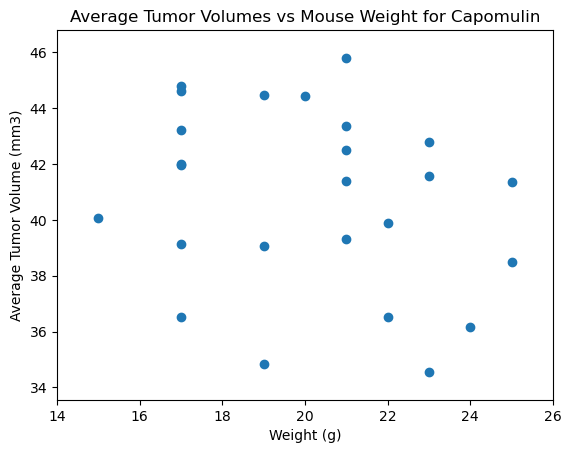

In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Ensure 'Tumor Volume (mm3)' and 'Weight (g)' are numeric, coercing errors to NaN
capo_set['Tumor Volume (mm3)'] = pd.to_numeric(capo_set['Tumor Volume (mm3)'], errors='coerce')
capo_set['Weight (g)'] = pd.to_numeric(capo_set['Weight (g)'], errors='coerce')

# Calculate the average tumor volume for each Mouse ID
capo_ave = capo_set.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().rename('Ave Volume')

# Calculate the average weight for each Mouse ID (instead of value_counts)
capo_weight = capo_set.groupby('Mouse ID')['Weight (g)'].mean()

# Drop duplicates for 'Mouse ID' and 'Weight (g)' and keep the last occurrence
cap_df = capo_set.drop_duplicates(subset=['Mouse ID', 'Weight (g)'], keep='last')

# Extract the weight values
weight_cap = cap_df['Weight (g)']

# Set the chart labels
plt.scatter(weight_cap.values, capo_ave.values)
plt.title('Average Tumor Volumes vs Mouse Weight for Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capo_ave.min() - 1, capo_ave.max() + 1)
plt.xlim(weight_cap.min() - 1, weight_cap.max() + 1)

# Show the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is -0.23


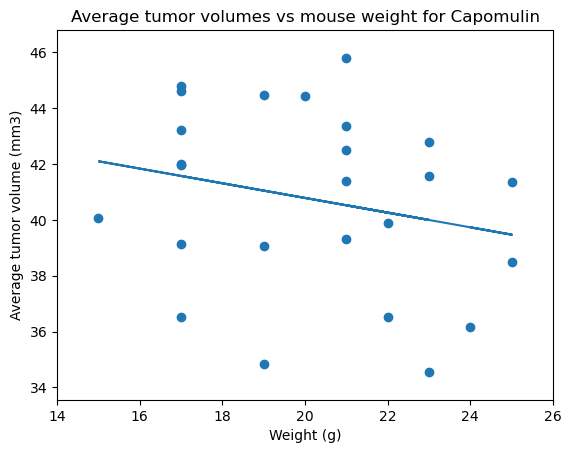

In [60]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(capo_ave.values,weight_cap.values)[0],2)}") 

# Linear Regression Model
# Perform a linear regression onmouse weight vs average tumor volume
ca_slope, ca_int, ca_r, ca_p, ca_std_err = st.linregress(weight_cap.values, capo_ave.values)

# Create equation of line to calculate predicted mouse weight
ca_fit = ca_slope * weight_cap.values + ca_int

# Plot the linear regression model on top of scatter plot
# Set the chart labels
plt.scatter(weight_cap.values,capo_ave.values)
plt.plot(weight_cap.values,ca_fit,'-')
plt.title('Average tumor volumes vs mouse weight for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capo_ave.values.min()-1,capo_ave.values.max()+1)
plt.xlim(weight_cap.values.min()-1,weight_cap.values.max()+1)

# Plot
plt.show()